In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

学習データとテストデータを用意

In [2]:
hand_name = ["Rock", "Scissors", "Paper"]
judge_name = ["draw", "win", "lose"]

hand_data = []
for i in range(3):
    for j in range(3):
        hand_data.append([i, j])
judge_data = [0, 1, 2, 2, 0, 1, 1, 2, 0]

x_train = x_test = np.array(hand_data)
y_train = y_test = np.array(judge_data)

In [ ]:
# modelを作成
model = keras.models.Sequential()

# 入力層：入力は2人の手で決まるので2変数
model.add(layers.Dense(8, activation="relu", input_dim=2))

# 全結合層：ReLU関数を採用
model.add(layers.Dense(8, activation="relu"))

# 出力層：勝ち, 負け, あいこの3種類
model.add(layers.Dense(3, activation="softmax"))

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

1000世代で学習

In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.1010 - val_accuracy: 0.3333 - val_loss: 1.0992
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3333 - loss: 1.0992 - val_accuracy: 0.2222 - val_loss: 1.0971
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2222 - loss: 1.0971 - val_accuracy: 0.2222 - val_loss: 1.0952
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2222 - loss: 1.0952 - val_accuracy: 0.2222 - val_loss: 1.0933
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.2222 - loss: 1.0933 - val_accuracy: 0.2222 - val_loss: 1.0914
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.2222 - loss: 1.0914 - val_accuracy: 0.2222 - val_loss: 1.0895
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2222 - loss: 1.0895 - val_accuracy: 0.2222 - val_loss: 1.0877
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.2222 - loss: 1.0877 - val_accuracy: 0.222

テスト

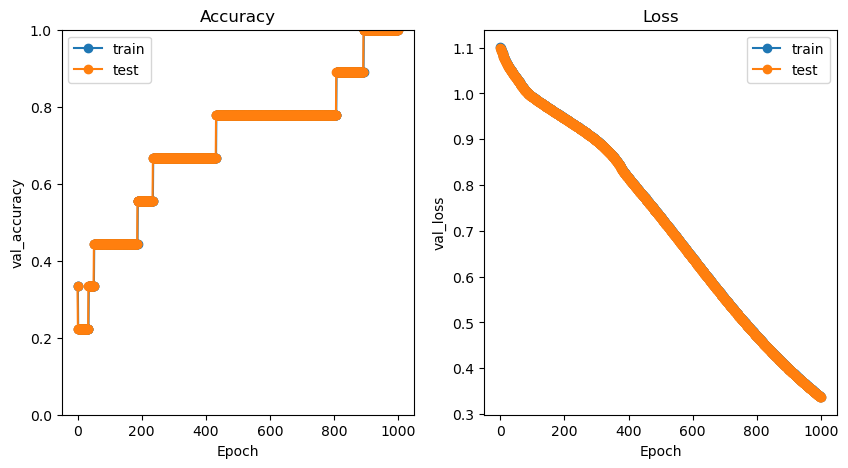

In [7]:
param =[["Accuracy", "accuracy", "val_accuracy"],["Loss", "loss", "val_loss"]]

plt.figure(figsize=(10, 5))
for i in range(2):
  plt.subplot(1, 2, i + 1)
  plt.title(f"{param[i][0]}")
  plt.xlabel("Epoch")
  plt.ylabel(param[i][2])
  plt.plot(history.history[param[i][1]], "o-")
  plt.plot(history.history[param[i][2]], "o-")
  plt.legend(["train", "test"])
  if i == 0:
    plt.ylim([0, 1])
plt.show()